In [33]:
number = "six" 

In [34]:
operator_folder = number + "_operator"

import sys
import os
import cPickle as pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append('utils')
from utility_functions import display_stats, plot_error, write_wavs
from IPython.display import Audio
from plugin_feature_extractor import PluginFeatureExtractor

hist_threshold = 23

np.random.seed(8)
sampleRate = 44100
data_folder = "data/overriden/" + operator_folder + "/"
overriden_parameters = np.load(data_folder + "overriden_parameters.npy").tolist()

print 155 - len(overriden_parameters)
extractor = PluginFeatureExtractor(midi_note=24, note_length_secs=0.4,
                                   desired_features=[i for i in range(8, 21)],
                                   overriden_parameters=overriden_parameters,
                                   render_length_secs=0.7,
                                   pickle_path="utils/normalisers",
                                   warning_mode="ignore",
                                   normalise_audio=False)
path = "/home/tollie/Development/vsts/dexed/Builds/Linux/build/Dexed.so"
extractor.load_plugin(path)

133
Successfully loaded plugin.


In [3]:
folder = operator_folder

from IPython.display import Audio

def visualise_prediction(actual_patch, predicted_patch):
    predicted_full_patch = extractor.partial_patch_to_patch(predicted_patch)
    predicted_patch_with_indices = extractor.add_patch_indices(predicted_full_patch)
    if extractor.set_patch(predicted_patch_with_indices):
        audio_predicted = extractor.get_audio_frames()

    actual_full_patch = extractor.partial_patch_to_patch(actual_patch)
    actual_patch_with_indices = extractor.add_patch_indices(actual_full_patch)
    if extractor.set_patch(actual_patch_with_indices):
        audio_actual = extractor.get_audio_frames()

    fig = plt.figure()
    plt.figure(figsize=(14,9))
    plt.subplot(221)
    ax1 = plt.specgram(audio_predicted, NFFT=512, Fs=sampleRate, noverlap=256)
    fig.subplots_adjust(hspace=2, wspace=4)
    # plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.title('predicted spectrogram')

    plt.subplot(222)
    ax2 = plt.plot(audio_predicted)
    fig.subplots_adjust(hspace=2, wspace=4)
    # plt.xlabel('Time (frame count)')
    plt.ylabel('Amplitude')
    plt.title('predicted audio')

    plt.subplot(223)
    ax3 = plt.specgram(audio_actual, NFFT=512, Fs=sampleRate, noverlap=256)
    fig.subplots_adjust(hspace=2, wspace=4)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.title('actual spectrogram')

    plt.subplot(224)
    ax4 = plt.plot(audio_actual)
    fig.subplots_adjust(hspace=2, wspace=4)
    plt.xlabel('Time (frame count)')
    plt.ylabel('Amplitude')
    plt.title('actual audio')
    plt.show()

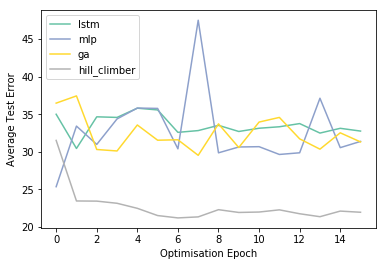

In [22]:
all_models_error = pickle.load(open("stats/" + folder + "/all_models_error.p", "rb")).items()

try:
    all_ga_error = pickle.load(open("stats/" + folder + "/ga_models_error.p", "rb")).items()
    all_models_error.extend(all_ga_error)
except:
    pass

try:
    all_hills_error = pickle.load(open("stats/" + folder + "/all_hills_error.p", "rb")).items()
    all_models_error.extend(all_hills_error)
except:
    pass

# Based on: http://stackoverflow.com/a/35971096/5398272
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for i in range(len(all_models_error)):
    (label, error) = all_models_error[i]
    if len(error) > 0:
        ax1.plot(error, label=label)

colormap = plt.cm.Set2
colors = [colormap(i) for i in np.linspace(0, 1, len(ax1.lines))]
for i, j in enumerate(ax1.lines):
    j.set_color(colors[i])
ax1.legend(loc=2)
plt.xlabel('Optimisation Epoch')
plt.ylabel('Average Test Error')
plt.show()

(21.960190053950768, {'predicted_features': array([[-1.88550056,  0.57706606,  0.424708  ,  0.45660019,  0.40706752,
         0.45512593,  0.47369809,  0.39253506,  0.4112869 ,  0.40330662,
         0.47266867,  0.42861142,  0.44846002],
       [-2.78665811,  0.82973956,  0.53964547,  0.59448508,  0.52838293,
         0.55095063,  0.59522104,  0.52070951,  0.56310738,  0.60775685,
         0.58691046,  0.59264752,  0.55181031],
       [ 0.44993367,  0.97389219,  0.94287565,  0.94461939,  0.93974073,
         0.94130953,  0.93914312,  0.93906176,  0.93890514,  0.93771478,
         0.93649796,  0.93940979,  0.93974338],
       [-2.043375  ,  0.58532813,  0.39979177,  0.43880337,  0.4074191 ,
         0.47201244,  0.44020015,  0.43800278,  0.46955121,  0.40098887,
         0.43443112,  0.39452958,  0.37252183],
       [-2.85850728,  0.84580261,  0.62502496,  0.56016097,  0.53465304,
         0.56612512,  0.56982154,  0.52662278,  0.55043657,  0.59449476,
         0.56779511,  0.52400985, 

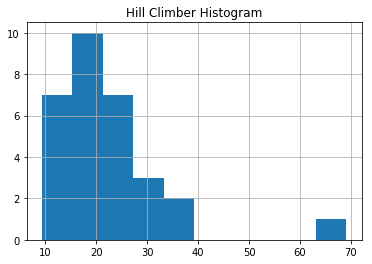

In [5]:
# stats == tuple(average_error, best_pairs, all_errors)
import pandas as pd

hill = pickle.load(open("stats/" + folder + "/hill_climber.p"))
print hill
hill_best_pairs = hill[1]
hill_all_errors = hill[2]

def mean_ieee(errors, name):
    print name + ": " + str(round(np.mean(errors), 1)) + " : " + str(round(np.mean(np.mean(sorted(errors)[0:23])), 1)) 

count, division1 = np.histogram(hill_all_errors)
series = pd.Series(np.array(hill_all_errors)).hist(bins=division1)
plt.title('Hill Climber Histogram')

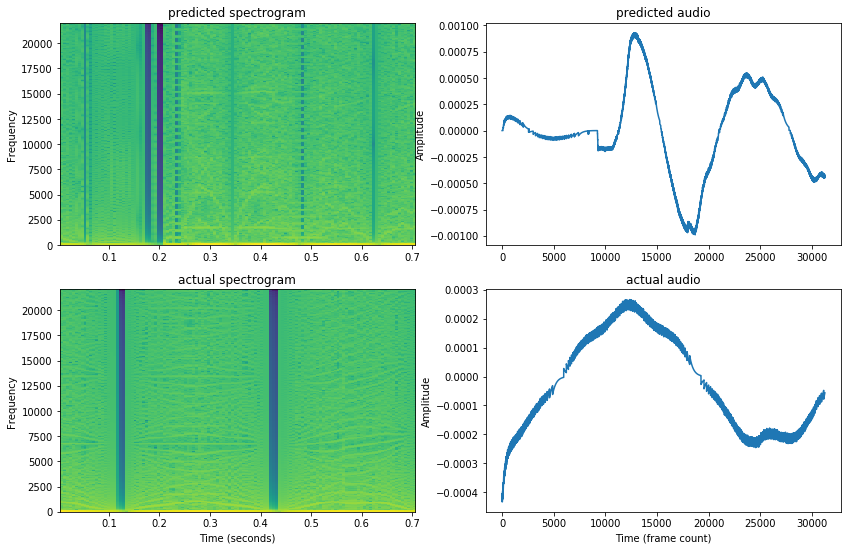

In [6]:
visualise_prediction(hill_best_pairs['actual_patch'], hill_best_pairs['predicted_patch'])

In [7]:
def audio(predicted_patch):
    predicted_full_patch = extractor.partial_patch_to_patch(predicted_patch)
    predicted_patch_with_indices = extractor.add_patch_indices(predicted_full_patch)
    if extractor.set_patch(predicted_patch_with_indices):
        return extractor.get_audio_frames()

Audio(audio(hill_best_pairs['predicted_patch']), rate=44100)

In [8]:
Audio(audio(hill_best_pairs['actual_patch']), rate=44100)

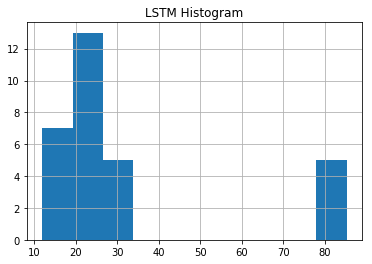

In [9]:
# stats == tuple(average_error, best_pairs, all_errors)
import pandas as pd

lstm = pickle.load(open("stats/" + folder + "/lstm.p"))

lstm_best_pairs = lstm[1]
lstm_all_errors = lstm[2]

count, division1 = np.histogram(lstm_all_errors)
series = pd.Series(np.array(lstm_all_errors)).hist(bins=division1)
plt.title('LSTM Histogram')

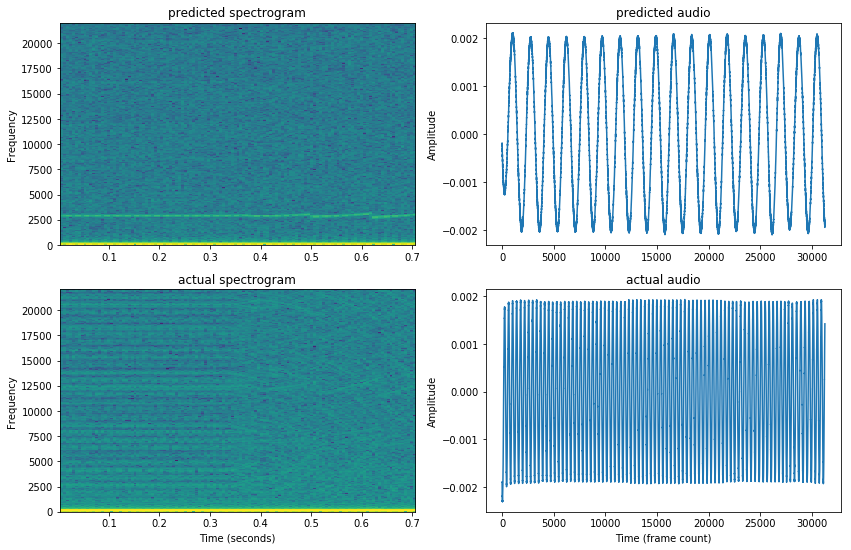

In [10]:
visualise_prediction(lstm_best_pairs['actual_patch'], lstm_best_pairs['predicted_patch'])

In [11]:
Audio(audio(lstm_best_pairs['predicted_patch']), rate=44100)

In [12]:
Audio(audio(lstm_best_pairs['actual_patch']), rate=44100)

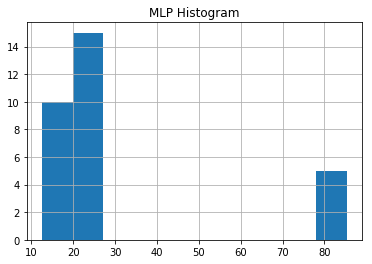

In [13]:
# stats == tuple(average_error, best_pairs, all_errors)
import pandas as pd

mlp = pickle.load(open("stats/" + folder + "/mlp.p"))

mlp_best_pairs = mlp[1]
mlp_all_errors = mlp[2]

count, division1 = np.histogram(mlp_all_errors)
series = pd.Series(np.array(mlp_all_errors)).hist(bins=division1)
plt.title('MLP Histogram')

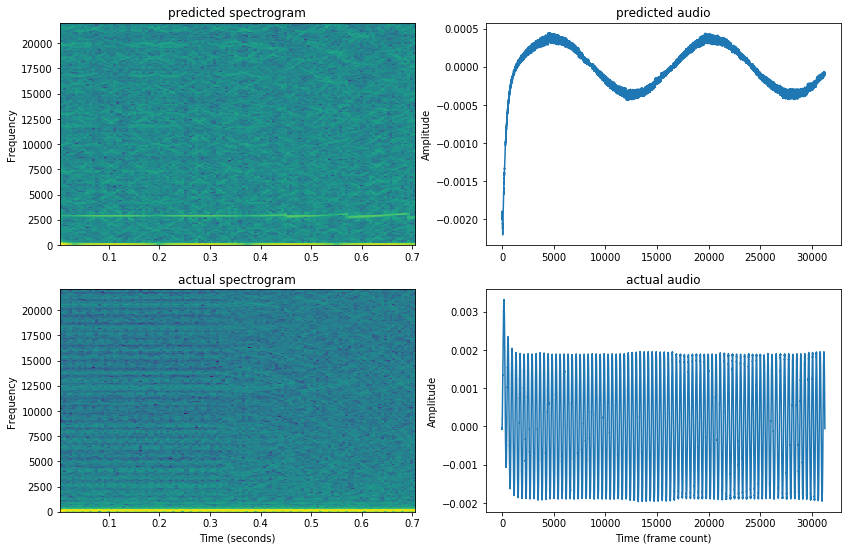

In [14]:
visualise_prediction(mlp_best_pairs['actual_patch'], mlp_best_pairs['predicted_patch'])

In [15]:
Audio(audio(mlp_best_pairs['predicted_patch']), rate=44100)

In [16]:
Audio(audio(mlp_best_pairs['actual_patch']), rate=44100)

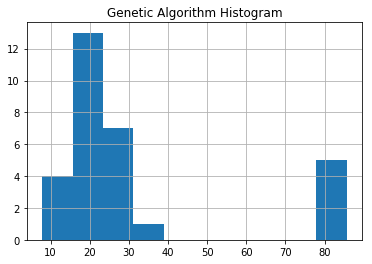

In [17]:
# stats == tuple(average_error, best_pairs, all_errors)
import pandas as pd

ga = pickle.load(open("stats/" + folder + "/ga.p"))

ga_best_pairs = ga[1]
ga_all_errors = ga[2]

count, division1 = np.histogram(ga_all_errors)
series = pd.Series(np.array(ga_all_errors)).hist(bins=division1)
plt.title('Genetic Algorithm Histogram')

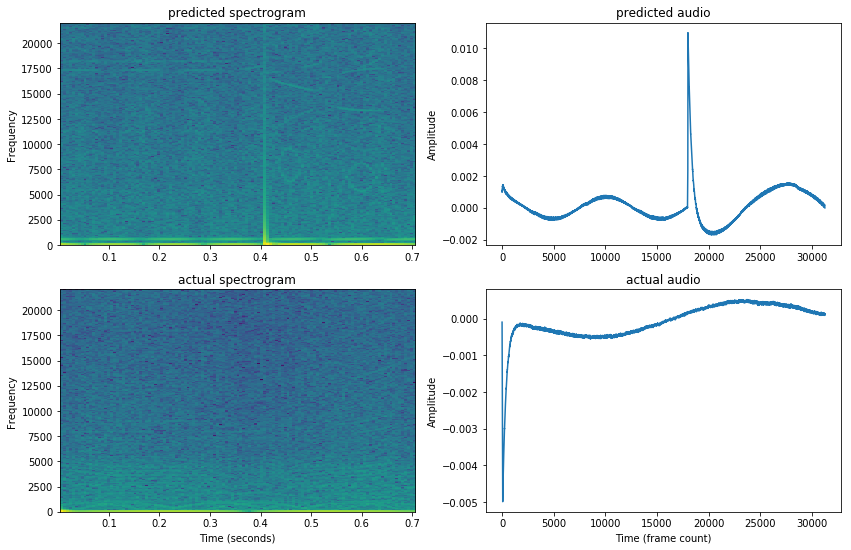

In [18]:
visualise_prediction(ga_best_pairs['actual_patch'], ga_best_pairs['predicted_patch'])

In [19]:
Audio(audio(ga_best_pairs['predicted_patch']), rate=44100)

In [20]:
Audio(audio(ga_best_pairs['actual_patch']), rate=44100)

In [21]:
mean_ieee(hill_all_errors, "Hill")
mean_ieee(ga_all_errors, "  Ga")
mean_ieee(mlp_all_errors, " MLP")
mean_ieee(lstm_all_errors, "LSTM")

def rounded_list(errors):
    print [round(e, 3) for e in errors]

print ""
print number + ":"
print ""
print "HC:"
rounded_list(hill_all_errors)
print "GA:"
rounded_list(ga_all_errors)
print "MLP:"
rounded_list(mlp_all_errors)
print "LSTM:"
rounded_list(lstm_all_errors)

Hill: 22.0 : 17.5
  Ga: 31.3 : 19.7
 MLP: 31.4 : 20.3
LSTM: 32.8 : 21.8

six:

HC:
[15.026, 13.322, 16.055, 36.944, 23.912, 16.526, 23.112, 22.882, 18.472, 28.782, 31.385, 16.518, 9.354, 16.233, 10.718, 18.11, 34.937, 26.726, 69.101, 20.964, 25.451, 18.018, 21.317, 18.729, 13.707, 27.663, 13.352, 24.922, 15.496, 11.069]
GA:
[19.767, 18.829, 25.092, 85.436, 23.992, 19.807, 11.478, 29.176, 20.067, 18.545, 21.623, 16.354, 10.647, 24.16, 14.892, 21.702, 83.937, 23.315, 85.601, 19.121, 18.474, 19.843, 26.365, 84.275, 32.221, 85.144, 28.477, 19.321, 23.977, 7.836]
MLP:
[20.399, 18.23, 22.766, 84.839, 25.196, 20.355, 16.63, 25.4, 12.584, 21.356, 17.84, 18.997, 14.891, 17.477, 19.564, 21.66, 83.624, 22.85, 85.278, 24.767, 21.441, 26.204, 18.981, 84.307, 25.65, 85.225, 20.222, 25.149, 25.413, 14.205]
LSTM:
[15.908, 23.925, 24.096, 84.909, 25.499, 15.705, 24.897, 29.377, 11.951, 26.867, 14.982, 24.494, 25.373, 20.139, 20.997, 17.542, 83.65, 19.694, 85.248, 24.07, 23.34, 28.867, 25.559, 84.297, 2